In [1]:
# Importing Libraries
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model(r"C:\Users\lokes\Downloads\Documents\models\vgg19\model_10-0.62.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(256, 256))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    #plt.title("Loaded Image")
    #plt.axis('off')
    #plt.imshow(img.squeeze())
    #plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis])

    # Label array
    labels = {0: 'Mild', 1: 'Normal', 2:'Severe'}

    #print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = np.argmax(p[0], axis=-1)
    #print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    #print("\n-------------------Individual Probability--------------------------------\n")

    #for i,j in enumerate (p[0],0):
        #print(labels[i].upper(),':',round(j*100,2),'%')
        #classes.append(labels[i])
        #prob.append(round(j*100,2))
        
    return predicted_class

In [3]:
import os
from tqdm import tqdm

In [4]:
true_classes = []
predicted_classes = []
test_dir = r"C:\Users\lokes\Downloads\Documents\models\test"
class_names = ['mild', 'normal', 'severe']

for class_name in tqdm(class_names):
    class_dir = os.path.join(test_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        predicted_class = predict(img_path)
        true_classes.append(class_names.index(class_name))
        predicted_classes.append(predicted_class)


true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 472ms/step


1/1 [==============================] - 1s 560ms/step


 33%|███████████████████████████▋                                                       | 1/3 [02:04<04:08, 124.25s/it]

1/1 [==============================] - 0s 472ms/step


1/1 [==============================] - 0s 459ms/step


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [04:47<02:27, 147.20s/it]

1/1 [==============================] - 0s 449ms/step


1/1 [==============================] - 1s 535ms/step


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [06:52<00:00, 137.63s/it]


In [5]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
predicted_classes

array([2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0,
       0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2,
       2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
accuracy_score(true_classes,predicted_classes)

0.6820987654320988

In [9]:
confusion_matrix(true_classes,predicted_classes)

array([[ 59,  35,  96],
       [ 17, 177,  36],
       [  6,  16, 206]], dtype=int64)

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [11]:
f1_score(true_classes,predicted_classes,average = None)

array([0.43382353, 0.77292576, 0.72791519])

In [12]:
precision_score(true_classes,predicted_classes,average = None)

array([0.7195122 , 0.77631579, 0.60946746])

In [13]:
recall_score(true_classes,predicted_classes,average = None)

array([0.31052632, 0.76956522, 0.90350877])

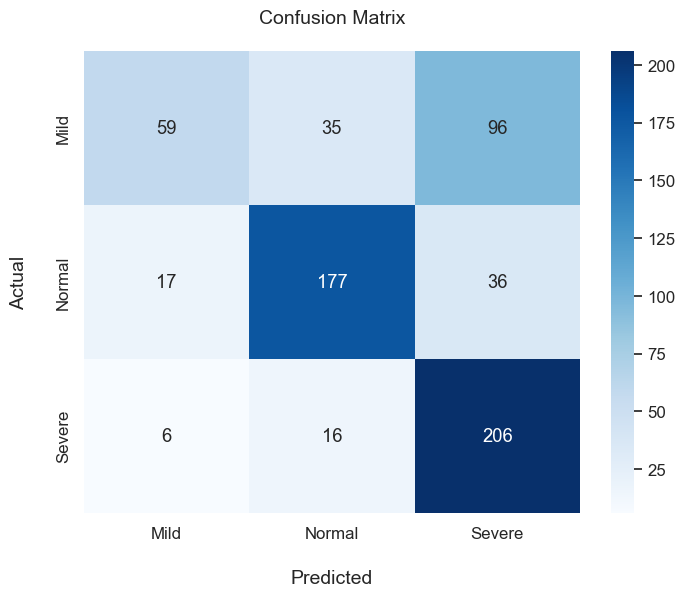

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

cf_matrix = confusion_matrix(true_classes,predicted_classes)

ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues')

ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Mild', 'Normal','Severe'])

ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Mild', 'Normal','Severe'])

ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()